# **Read and Prepare Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/udara_jakarta_2021-2024.csv')
df

,pm10,pm25,so2,co,o3,no2,categori
0,59,79,21,26,15,31,2
1,30,46,21,14,16,24,3
2,23,33,19,11,14,19,3
3,36,53,23,14,12,24,2
4,29,36,20,14,12,21,3
...,...,...,...,...,...,...,...
4147,52,91,36,19,44,16,2
4148,55,104,34,20,54,14,1
4149,44,94,34,20,46,15,2
4150,53,102,33,21,39,19,1


In [ ]:
df.describe()

,pm10,pm25,so2,co,o3,no2,categori
count,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000
mean,53.936898,77.222784,38.995183,13.167148,30.591763,21.849229,1.932803
std,15.148184,23.129952,13.717895,6.538989,17.432674,12.397550,0.458925
min,3.000000,10.000000,2.000000,1.000000,3.000000,0.000000,0.000000
25%,45.000000,62.000000,27.000000,9.000000,19.000000,13.000000,2.000000
50%,55.000000,77.000000,41.000000,12.000000,27.000000,20.000000,2.000000
75%,64.000000,91.000000,51.000000,16.000000,37.000000,28.000000,2.000000
max,179.000000,287.000000,89.000000,70.000000,181.000000,202.000000,3.000000


In [ ]:
df.isnull().sum()

,0
pm10,0
pm25,0
so2,0
co,0
o3,0
no2,0
categori,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pm10      4152 non-null   int64
 1   pm25      4152 non-null   int64
 2   so2       4152 non-null   int64
 3   co        4152 non-null   int64
 4   o3        4152 non-null   int64
 5   no2       4152 non-null   int64
 6   categori  4152 non-null   int64
dtypes: int64(7)
memory usage: 227.2 KB


# **Exploratory Data Analysis**

/tmp/ipython-input-7-4283727823.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item.index, y=item.values, palette='cividis')


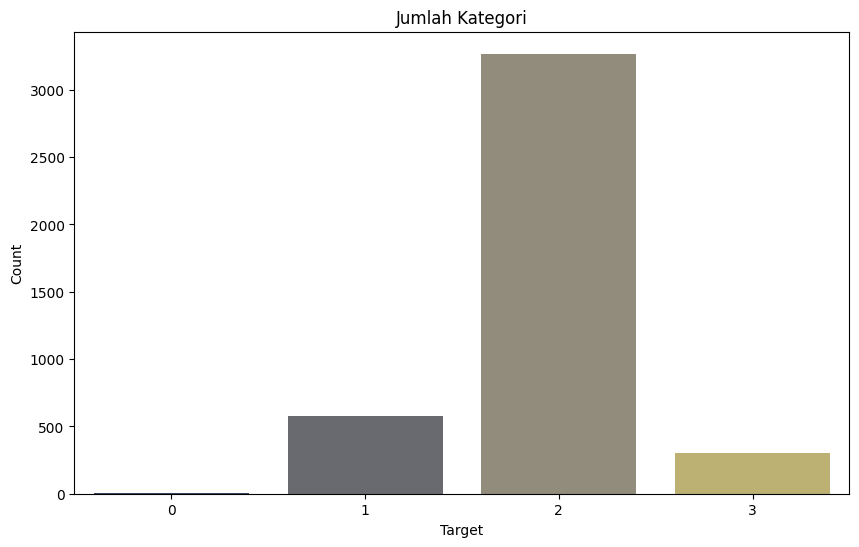

In [ ]:
# Create the barplot
item = df['categori'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=item.index, y=item.values, palette='cividis')
plt.title('Jumlah Kategori')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

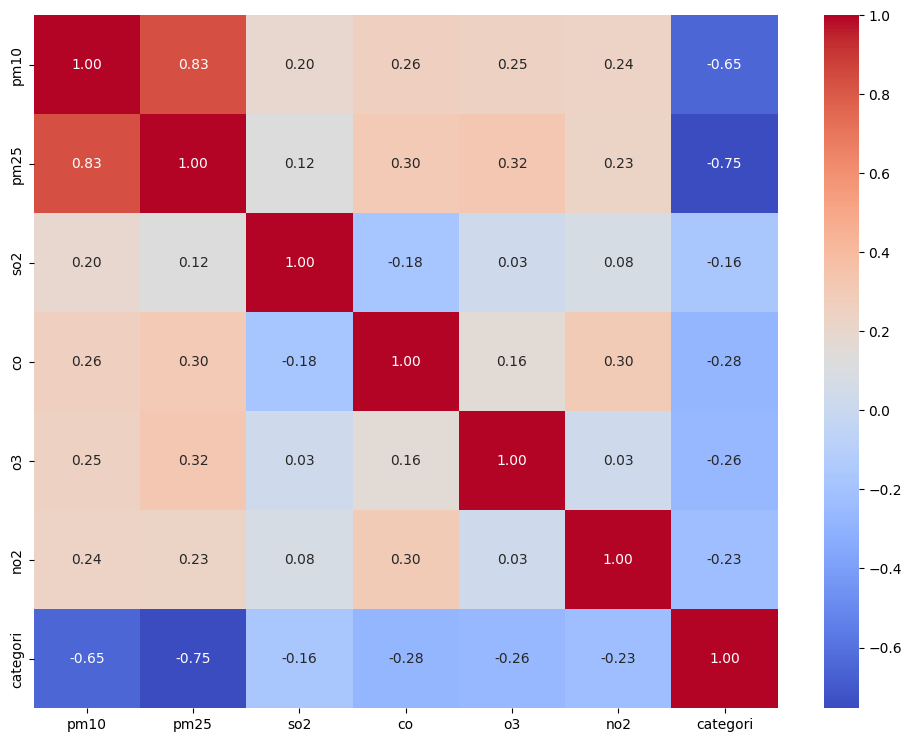

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

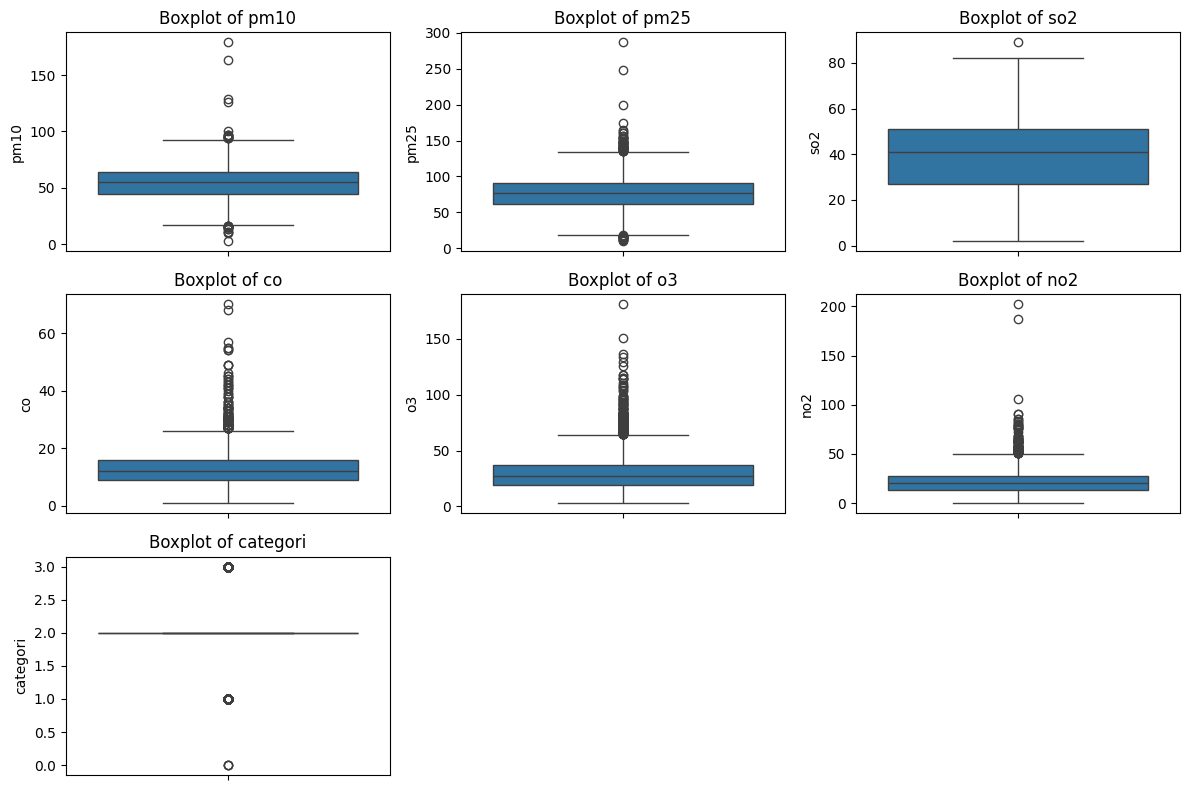

In [ ]:
# Boxplot
plt.figure(figsize=(12, 8))
for i, col in enumerate(df, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

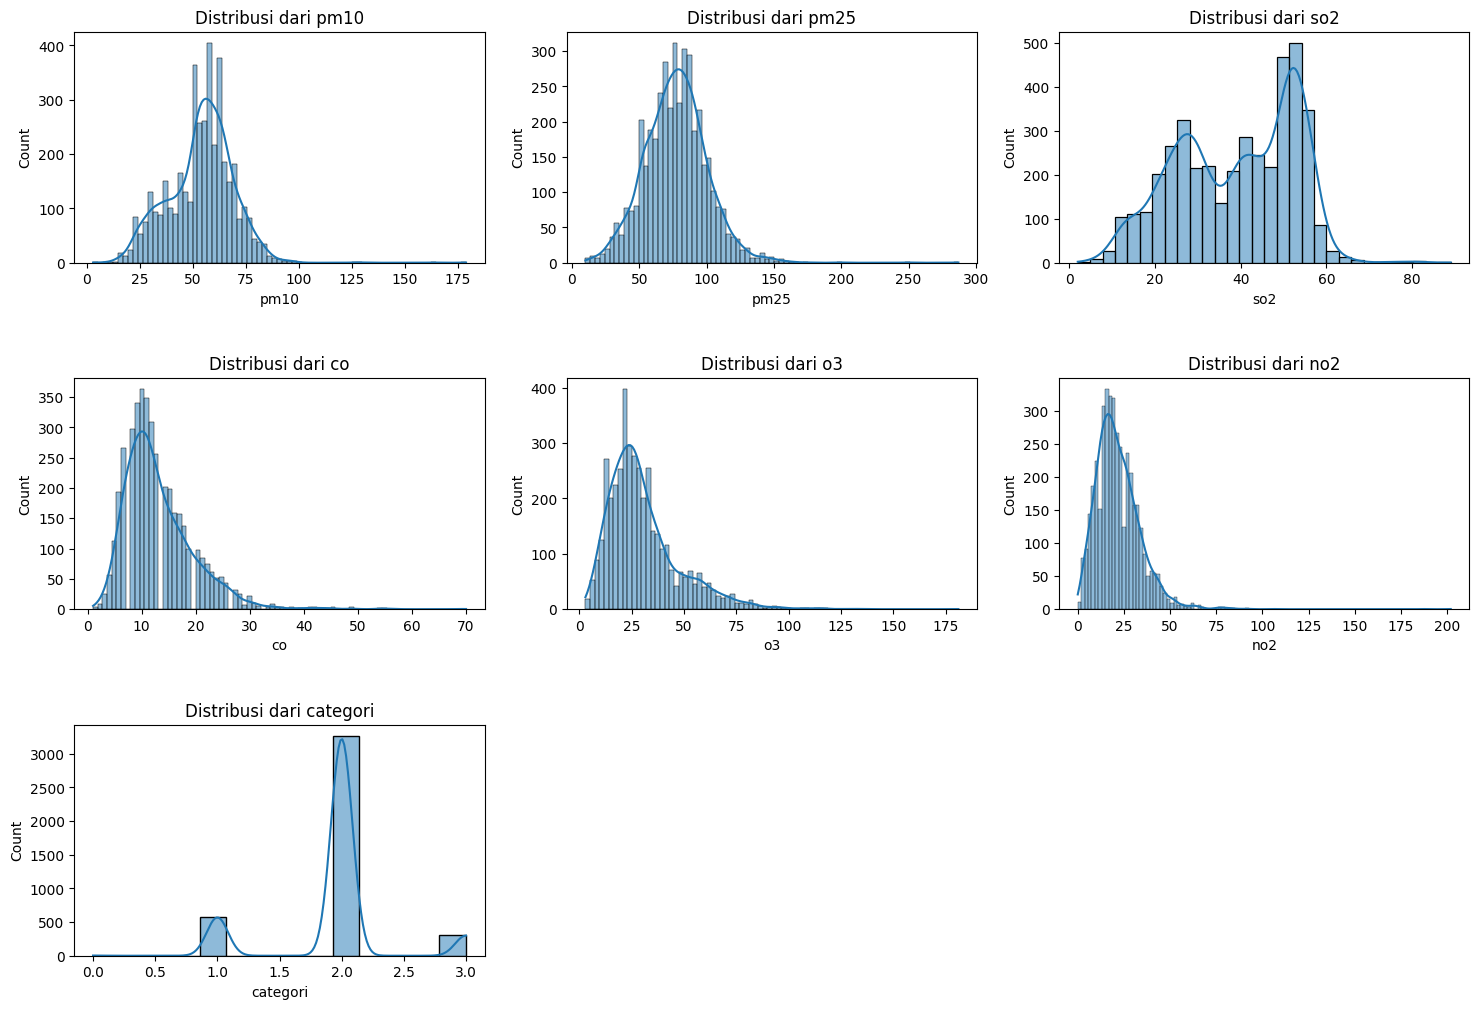

In [ ]:
# Distribusi
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(df, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribusi dari {var}')
plt.show()

In [ ]:
X = df.drop(['categori'], axis = 1)
y = df['categori']

In [ ]:
y.value_counts()

,count
categori,
2,3268
1,577
3,304
0,3


# **Pre-Processing Build Model**

In [ ]:
!pip install feature-engine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats.mstats import winsorize
from feature_engine.outliers import Winsorizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 1.3 MB/s eta 0:00:00


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
print(pd.Series(y_train).value_counts())

categori
2    2605
1     482
3     232
0       2
Name: count, dtype: int64


In [ ]:
# SMOTEENN
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

# SMOTEENN hanya untuk data train
smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
smoteenn = SMOTEENN(smote=smote, random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

,count
categori,
0,2605
3,2604
1,2584
2,2416


# KNN

In [ ]:
# Membuat pipeline dengan preprocessing dan model KNN
pipelineknn = Pipeline([
    ('winsorizer', Winsorizer(capping_method='quantiles', tail='both', fold=0.05)),
    ('knn', KNeighborsClassifier())
])

# Training pipeline KNN menggunakan data yang sudah di-resample (X_resampled, y_resampled)
pipelineknn.fit(X_resampled, y_resampled)

# Prediksi menggunakan X_test (data asli, tidak di-resample)
y_predknn = pipelineknn.predict(X_test)

# Evaluasi untuk KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_predknn))
print(confusion_matrix(y_test, y_predknn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.78      0.98      0.87        95
           2       0.99      0.92      0.95       663
           3       0.70      0.96      0.81        72

    accuracy                           0.93       831
   macro avg       0.74      0.96      0.83       831
weighted avg       0.94      0.93      0.93       831

[[  1   0   0   0]
 [  1  93   1   0]
 [  0  26 608  29]
 [  0   0   3  69]]


In [ ]:
# Definisikan KFold untuk cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scoresknn = cross_val_score(pipelineknn, X, y, cv=kfold, scoring='accuracy')

# Menampilkan skor rata-rata dan standar deviasi
print(scoresknn)
print(f"Skor rata-rata: {scoresknn.mean():.3f}")
print(f"Standar deviasi: {scoresknn.std():.3f}")

[0.95432692 0.95913462 0.96385542 0.95421687 0.97108434 0.95180723
 0.95903614 0.9686747  0.95662651 0.9686747 ]
Skor rata-rata: 0.961
Standar deviasi: 0.007


In [ ]:
print(pipelineknn.get_params())

{'memory': None, 'steps': [('winsorizer', Winsorizer(capping_method='quantiles', fold=0.05, tail='both')), ('knn', KNeighborsClassifier())], 'transform_input': None, 'verbose': False, 'winsorizer': Winsorizer(capping_method='quantiles', fold=0.05, tail='both'), 'knn': KNeighborsClassifier(), 'winsorizer__add_indicators': False, 'winsorizer__capping_method': 'quantiles', 'winsorizer__fold': 0.05, 'winsorizer__missing_values': 'raise', 'winsorizer__tail': 'both', 'winsorizer__variables': None, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'uniform'}


# SVM

In [ ]:
# Membuat pipeline dengan preprocessing dan model SVM
pipelinesvm = Pipeline([
    ('winsorizer', Winsorizer(capping_method='quantiles', tail='both', fold=0.05)),
    ('svm', SVC())
])
# Training dan evaluasi untuk svm
pipelinesvm.fit(X_resampled, y_resampled)
y_predsvm = pipelinesvm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_predsvm))
print(confusion_matrix(y_test, y_predsvm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.70      0.99      0.82        95
           2       1.00      0.86      0.92       663
           3       0.57      1.00      0.73        72

    accuracy                           0.88       831
   macro avg       0.69      0.96      0.78       831
weighted avg       0.93      0.88      0.89       831

[[  1   0   0   0]
 [  1  94   0   0]
 [  0  41 568  54]
 [  0   0   0  72]]


In [ ]:
# Definisikan KFold untuk cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scoressvm = cross_val_score(pipelinesvm, X, y, cv=kfold, scoring='accuracy')

# Menampilkan skor rata-rata dan standar deviasi
print(scoressvm)
print(f"Skor rata-rata: {scoressvm.mean():.3f}")
print(f"Standar deviasi: {scoressvm.std():.3f}")

[0.97596154 0.97596154 0.96626506 0.9686747  0.97590361 0.97590361
 0.96385542 0.97590361 0.96385542 0.97349398]
Skor rata-rata: 0.972
Standar deviasi: 0.005


In [ ]:
print(pipelinesvm.get_params())

{'memory': None, 'steps': [('winsorizer', Winsorizer(capping_method='quantiles', fold=0.05, tail='both')), ('svm', SVC())], 'transform_input': None, 'verbose': False, 'winsorizer': Winsorizer(capping_method='quantiles', fold=0.05, tail='both'), 'svm': SVC(), 'winsorizer__add_indicators': False, 'winsorizer__capping_method': 'quantiles', 'winsorizer__fold': 0.05, 'winsorizer__missing_values': 'raise', 'winsorizer__tail': 'both', 'winsorizer__variables': None, 'svm__C': 1.0, 'svm__break_ties': False, 'svm__cache_size': 200, 'svm__class_weight': None, 'svm__coef0': 0.0, 'svm__decision_function_shape': 'ovr', 'svm__degree': 3, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'svm__max_iter': -1, 'svm__probability': False, 'svm__random_state': None, 'svm__shrinking': True, 'svm__tol': 0.001, 'svm__verbose': False}


# **Uji Data Baru**

In [ ]:
databaru = pd.read_csv('/content/databaru.csv')
databaru

,pm10,pm25,so2,co,o3,no2
0,28,33,17,13,16,24
1,21,18,15,13,20,6
2,45,52,25,10,15,16
3,54,68,23,12,33,14
4,66,95,51,16,14,14
5,40,70,52,12,21,17
6,63,113,39,19,25,19
7,60,99,35,23,50,20
8,72,111,54,32,22,61
9,88,243,27,19,22,21


In [ ]:
pipelineknn.predict(databaru)

array([3, 3, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0])

In [ ]:
pipelinesvm.predict(databaru)

array([3, 3, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0])

# **Save Model**

In [ ]:
import joblib

In [ ]:
#save model
model = 'model_airwise.pkl'
joblib.dump(pipelinesvm, model)

['model_airwise.pkl']